In [1]:
import numpy as np
import ssm
import matplotlib.pyplot as plt

In [2]:
# Fixing random seed
seed = 10
np.random.seed(seed)

In [3]:
# Set the parameters of the GLM-HMM
num_states = 3   # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = 2         # input dimensions

In [4]:
# Make a GLM-HMM which will be our data generator
true_iohmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                   observation_kwargs=dict(C=num_categories), transitions="standard")
gen_weights = np.array([[[6, 1]], [[2, -3]], [[2, 3]]])
gen_log_trans_mat = np.log(np.array([[[0.98, 0.01, 0.01], [0.05, 0.92, 0.03], [0.02, 0.03, 0.94]]]))
true_iohmm.observations.params = gen_weights
true_iohmm.transitions.params = gen_log_trans_mat
gen_trans_mat = np.exp(gen_log_trans_mat)[0]

In [5]:
num_sess = 1 # number of example sessions
num_trials_per_sess = 1000 # number of trials in a session
inputs = np.ones((num_sess, num_trials_per_sess, input_dim)) # initialize inpts array
stim_vals = np.arange(-5,5,step=0.01).tolist() # Stimuli values 
inputs[:,:,0] = np.random.choice(stim_vals, (num_sess, num_trials_per_sess)) # generate random sequence of potential inputs
inputs = list(inputs) #convert inputs to correct format

In [6]:
# Generate a sequence of latents and choices for each session
true_latents, true_choices = [], []
for sess in range(num_sess):
    true_z, true_y = true_iohmm.sample(num_trials_per_sess, input=inputs[sess])
    true_latents.append(true_z)
    true_choices.append(true_y)

In [7]:
#Create a new test iohmm
test_iohmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
                       observation_kwargs=dict(C=num_categories), transitions="standard")
# Reshaping weights to compute error later
true_weights = np.reshape(gen_weights, (num_states, input_dim))

In [8]:
test_iohmm.observations.params

array([[[ 1.45386364, -0.40627918]],

       [[ 0.12379003,  0.98267961]],

       [[-0.73640229,  0.37096751]]])

In [9]:
obsparams_sampled, Ps_sampled, pi0_sampled, fit_ll, pzts_persample  = test_iohmm.fit(true_choices, inputs=inputs, method='gibbs')

LP: -194.7:   0%|          | 0/700 [00:00<?, ?it/s]/Users/aditijha/opt/anaconda3/envs/al/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
LP: -164.1: 100%|██████████| 700/700 [00:48<00:00, 14.35it/s]


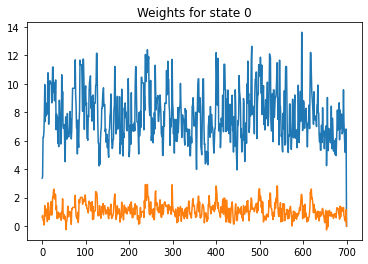

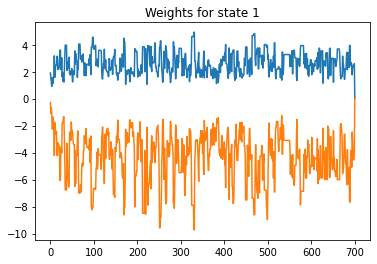

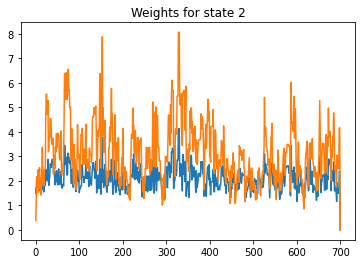

In [10]:
for i in range(num_states):
    # obtain weights for this state
    weights = obsparams_sampled[:,i]
    # plot weights
    plt.plot(weights[:,0])
    plt.plot(weights[:,1])
    plt.title('Weights for state ' + str(i))
    plt.show()